In [36]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [37]:
#生成数据集（人造数据集）
def synthetic_data(w,b,num_examples): #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))  #正态分布
    y = torch.matmul(X,w) + b
    y += torch.normal(0,0.01,y.shape) #噪声项
    return X, y.reshape((-1,1))

In [38]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [39]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.6036, -0.6457]) 
label: tensor([5.1910])


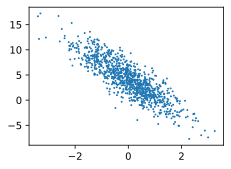

In [40]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [41]:
#读取数据集
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples)) #生成索引
    random.shuffle(indices) #打乱索引
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices], labels[batch_indices] #逐步返回值

In [42]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.9257, -0.2866],
        [ 1.0216,  0.2799],
        [-0.0570, -1.2658],
        [-0.7338, -0.8369],
        [-0.2243,  0.1790],
        [ 0.1023,  1.6312],
        [ 0.5608,  0.0996],
        [ 2.0326,  0.3333],
        [ 1.5116, -0.4196],
        [-0.3108,  0.7702]]) 
 tensor([[ 3.3219],
        [ 5.2968],
        [ 8.3827],
        [ 5.5836],
        [ 3.1364],
        [-1.1384],
        [ 4.9749],
        [ 7.1491],
        [ 8.6458],
        [ 0.9564]])


In [43]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
w , b

(tensor([[ 0.0008],
         [-0.0086]], requires_grad=True),
 tensor([0.], requires_grad=True))

In [44]:
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

In [45]:
def squared_loss(y_hat, y): #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [46]:
def sgd(params, lr, batch_size): #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad / batch_size
            param.grad.zero_()

In [47]:
#开始训练
lr = 0.03
num_epochs =3
net = linreg
loss = squared_loss

In [48]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) # X和y的小批量损失
        l.sum().backward()
        sgd([w,b], lr, batch_size) # 使用参数的梯度更新参数
    with torch.no_grad():
        train_loss = loss(net(features, w, b),labels)
        print(f'epoch {epoch+1}, loss {float(train_loss.mean()):f}')

epoch 1, loss 0.046661
epoch 2, loss 0.000201
epoch 3, loss 0.000051


In [52]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-0.0002, -0.0005], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0015], grad_fn=<RsubBackward1>)
